In [2]:
import os
import cv2
import matplotlib.pyplot as plt

import fairotag as frt

In [3]:
MARKER_LENGTH = 0.05

NUM_CALIB_SAMPLES = 5
DATA_DIR = "data/0_marker_pose_estimation"

In [4]:
c = frt.CameraModule()

In [9]:
# Calibrate camera
imgs = []
for i in range(NUM_CALIB_SAMPLES):
    filename = os.path.join(DATA_DIR, f"charuco_{i + 1}.jpg")
    imgs.append(cv2.imread(filename))
c.calibrate_camera(imgs)

In [10]:
c.register_marker_size(0, MARKER_LENGTH)
c.register_marker_size(3, MARKER_LENGTH)
c.register_marker_size(4, MARKER_LENGTH)

In [11]:
img = cv2.imread(os.path.join(DATA_DIR, "test_5x5.jpg"))
markers = c.detect_markers(img)

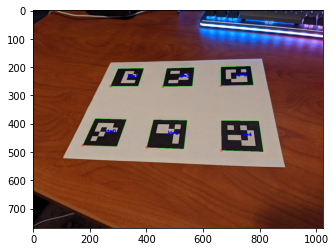

In [12]:
img_rend = c.render_markers(img, markers=markers)
plt.imshow(img_rend[:,:,::-1])